# Chapter 1 - Sequence Statistics 

In [1]:
import os
import sys 

import pandas as pd

In [83]:
%matplotlib inline

##  SARS-COV-2 Genome 
It is stored in a FASTA format, lines starting with `>` to be ignored

In [3]:
cov2genomefile = f'{os.getcwd()}/fasta/SARS-COV-2-MT226610.1.txt'

In [8]:
cov2genome = ''

with open(cov2genomefile) as f:
     for line in f.readlines():
            if not line.startswith('>'):
                cov2genome += line.strip()

In [11]:
cov2genome[:25]

'ATTAAAGGTTTATACCTTCCCAGGT'

In [85]:
print(
    'What is the length of the genome? {:,}'.format(
        len(cov2genome)
    )
)

What is the length of the genome? 29,903


In [88]:
nucleotides_vocabulary = list(set(cov2genome))

print(
    'What is the vocabulary of the genome; i.e. the nucleotides? {}'.format(
        sorted(nucleotides_vocabulary)
    )
)

What is the vocabulary of the genome; i.e. the nucleotides? ['A', 'C', 'G', 'T']


## The Frequency of the nucleotides

The Frequency of the nucleotides are like a fingerprint for each orgnism

In [23]:
nucleotides_frequency = {}

for nucleotide in cov2genome:
    nucleotides_frequency[nucleotide] = nucleotides_frequency.get(nucleotide, 0) + 1

In [24]:
nucleotides_frequency

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}

In [93]:
for nucleotide in nucleotides_frequency:
    freq = nucleotides_frequency[nucleotide] / len(cov2genome)
    print(
        f'{nucleotide}: {freq:.2%}'
    )

A: 29.94%
T: 32.08%
G: 19.61%
C: 18.37%


In [107]:
window = 600
nucleotides_window_frequency = []

for i in range(0, len(cov2genome), window):
    _nucleotides_frequency = {}
    for nucleotide in cov2genome[i:i+window]:
        _nucleotides_frequency[nucleotide] = _nucleotides_frequency.get(nucleotide, 0) + 1
    nucleotides_window_frequency.append(_nucleotides_frequency)

In [108]:
df_freq = pd.DataFrame(nucleotides_window_frequency) 

In [109]:
totals = df_freq.sum(axis=1)

for nucleotide in nucleotides_vocabulary:
    df_freq[nucleotide] = df_freq[nucleotide] / totals
    
df_freq.index = df_freq.index * window

In [110]:
df_freq.head(4)

,A,C,G,T
0,0.238333,0.228333,0.245000,0.288333
600,0.296667,0.201667,0.228333,0.273333
1200,0.280000,0.180000,0.218333,0.321667
1800,0.290000,0.168333,0.218333,0.323333


Changes in frequency reflect different regions in the genome

/Users/tarek/anaconda3/envs/djs/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


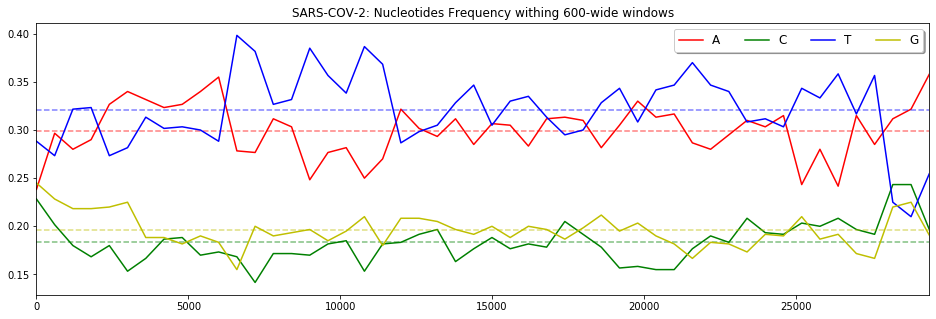

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

cmap = ['r', 'g', 'b', 'y']

for i, nucleotide in enumerate(nucleotides_vocabulary):
    
    df_freq[nucleotide].plot(
        title=f'SARS-COV-2: Nucleotides Frequency withing {window}-wide windows',
        kind='line',
        label=f'{nucleotide}',
        color=cmap[i],
        ax=ax
    )

    ax.axhline(
        y=nucleotides_frequency[nucleotide] / len(cov2genome),
        color=cmap[i],
        linestyle='--',
        alpha=0.5,
    )
    
ax.legend(ncol=4, fontsize='large', shadow=True)

fig.show()

## N-Gram 

In [171]:
n_gram_length = 2
n_gram_freq = {}

for i in range(0, len(cov2genome) - n_gram_length + 1):
    n_gram = cov2genome[i:i+n_gram_length]
    n_gram_freq[n_gram] = n_gram_freq.get(n_gram, 0) + 1
    
df_n_gram_freq = pd.DataFrame(
    [n_gram_freq], index=['P(N1,N2)']
).T

df_n_gram_freq = df_n_gram_freq / df_n_gram_freq.sum()

df_n_gram_freq['P(N1)*P(N2)'] = [
    (nucleotides_frequency[n_gram[0]] / len(cov2genome)) * (nucleotides_frequency[n_gram[1]] / len(cov2genome))
    for n_gram in df_n_gram_freq.index
]

df_n_gram_freq['P(N1,N2) / P(N1)*P(N2)'] = df_n_gram_freq['P(N1,N2)'] / df_n_gram_freq['P(N1)*P(N2)']

In [172]:
df_n_gram_freq.sort_values('P(N1,N2) / P(N1)*P(N2)', ascending=False).head(15)

,"P(N1,N2)",P(N1)*P(N2),"P(N1,N2) / P(N1)*P(N2)"
TG,0.086583,0.062906,1.376391
CA,0.069694,0.054994,1.267300
AC,0.067654,0.054994,1.230205
CT,0.069594,0.058925,1.181058
GC,0.039061,0.036010,1.084730
AA,0.096315,0.089661,1.074206
GT,0.066551,0.062906,1.057944
TT,0.107518,0.102937,1.044506
AG,0.058257,0.058709,0.992294
GG,0.036553,0.038442,0.950845


In [166]:
n_gram_length = 5
n_gram_freq = {}

for i in range(0, len(cov2genome) - n_gram_length + 1):
    n_gram = cov2genome[i:i+n_gram_length]
    n_gram_freq[n_gram] = n_gram_freq.get(n_gram, 0) + 1

In [167]:
df_n_gram_freq = pd.DataFrame(
    [n_gram_freq], index=['# Occurences']
).T

df_n_gram_freq = df_n_gram_freq / df_n_gram_freq.sum()

df_n_gram_freq.sort_values('# Occurences', ascending=False).head(8)

,# Occurences
TTGTT,0.003411
TGTTA,0.003378
AACAA,0.003311
TGTTG,0.003244
TTCTT,0.003244
TTTTG,0.003244
TTACA,0.003211
TTAAA,0.003177
